In [803]:
'''
Import and check data
'''

'\nImport and check data\n'

In [804]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)

In [805]:
# import file

data = pd.read_csv('loan_data_2007_2014.csv')

/var/folders/pd/tt8w11q15k38bnp8rcj8hqq00000gn/T/ipykernel_67295/1453710222.py:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('loan_data_2007_2014.csv')


In [806]:
# check data
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [807]:
data.shape

(466285, 75)

In [808]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [809]:
# check for unique values
print(data.shape)

print(data.id.nunique())
print(data.member_id.nunique())


(466285, 75)
466285
466285


In [810]:
# check for duplicate data
data.duplicated().sum()

0

In [811]:
# drop data not needed
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    , 'addr_state'

    , 'recoveries'
    
    # there is grade so sub_grade is not needed
    , 'sub_grade'
]

data = data.drop(cols_to_drop, axis=1)

In [812]:
data.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,10000,10000,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


In [813]:
# loan status unique values (the y variable)
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [814]:
# split loan status into low and high risk
high_risk = ['Late (31-120 days)', 'Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']                 # 1
low_risk = ['Fully Paid', 'Current', 'Does not meet the credit policy. Status:Fully Paid', 'In Grace Period', 'Late (16-30 days)']  # 0

data['high_risk_loan'] = data['loan_status'].apply(lambda x: 1 if x in high_risk else 0)

In [815]:
data.drop('loan_status', axis=1, inplace=True)

data.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,high_risk_loan
0,0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Dec-11,n,credit_card,Computer,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
1,1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,n,car,bike,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1
2,2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,n,small_business,real estate business,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
3,3,10000,10000,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,n,other,personel,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0
4,4,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,n,other,Personal,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0


In [816]:
'''
Cleaning data and feature engineering
'''

'\nCleaning data and feature engineering\n'

In [817]:
# check column
data.columns


Index(['Unnamed: 0', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'high_risk_loan'],
      dtype='object')

In [818]:
# show all values for each 'object' collumn and amount of unique data
for collumn in data.columns:
    if data[collumn].dtype == 'object':
        print(collumn)
        print(data[collumn].unique())
        print("")
        print(f'Number of Unique Data {data[collumn].nunique()}')
        print("-------------------------\n")

term
[' 36 months' ' 60 months']

Number of Unique Data 2
-------------------------

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']

Number of Unique Data 7
-------------------------

emp_title
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']

Number of Unique Data 205475
-------------------------

emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

Number of Unique Data 11
-------------------------

home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

Number of Unique Data 6
-------------------------

verification_status
['Verified' 'Source Verified' 'Not Verified']

Number of Unique Data 3
-------------------------

issue_d
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 '

In [819]:
# term
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

print(data['term_int'].unique())

# drop original term
data.drop('term', axis=1, inplace=True)

[36. 60.]


In [820]:
# emp_length
data['emp_length_year'] = data['emp_length'].str.replace('10+ years', '10')
data['emp_length_year'] = data['emp_length_year'].str.replace('< 1 year', str(0))
data['emp_length_year'] = data['emp_length_year'].str.replace(' years', '')
data['emp_length_year'] = data['emp_length_year'].str.replace(' year', '')

data['emp_length_year'] = data['emp_length_year'].astype(float)

print(data['emp_length_year'].unique())

# drop original emp_length
data.drop('emp_length', axis=1, inplace=True)

[10.  0.  1.  3.  8.  9.  4.  5.  6.  2.  7. nan]


In [821]:
# earliest_cr_line
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data.drop('earliest_cr_line', axis=1, inplace=True)

In [822]:
# issue_d
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data.drop('issue_d', axis=1, inplace=True)

In [823]:
# last_pymnt_d
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data.drop('last_pymnt_d', axis=1, inplace=True)

In [824]:
# next_pymnt_d
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data.drop('next_pymnt_d', axis=1, inplace=True)

In [825]:
# last_credit_pull_d
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data.drop('last_credit_pull_d', axis=1, inplace=True)

In [826]:
# object data unique values
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63098
initial_list_status         2
application_type            1
dtype: int64

In [827]:
# drop columns with too many / only 1 unique values
data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [828]:
# convert object data to numeric (One Hot Encoding)
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

onehot = pd.get_dummies(data[categorical_cols], drop_first=True).astype(int)

onehot.head()

# drop original object data
data.drop(categorical_cols, axis=1, inplace=True)

# merge onehot with data
data = pd.concat([data, onehot], axis=1)

In [829]:
# non object data unique values
data.select_dtypes(exclude='object').nunique()

Unnamed: 0                             466285
loan_amnt                                1352
funded_amnt                              1354
funded_amnt_inv                          9854
int_rate                                  506
installment                             55622
annual_inc                              31901
dti                                      3997
delinq_2yrs                                24
inq_last_6mths                             28
mths_since_last_delinq                    145
mths_since_last_record                    123
open_acc                                   62
pub_rec                                    26
revol_bal                               58142
revol_util                               1269
total_acc                                 112
out_prncp                              135665
out_prncp_inv                          141189
total_pymnt                            351609
total_pymnt_inv                        347659
total_rec_prncp                   

In [830]:
# drop columns with too many / only 1 unique values
data.drop(['policy_code'], axis=1, inplace=True)

In [831]:
# check for collumns with missing values
data.columns[data.isnull().sum() > 0]

Index(['annual_inc', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'emp_length_year',
       'earliest_cr_line_date', 'last_pymnt_d_date', 'next_pymnt_d_date',
       'last_credit_pull_d_date'],
      dtype='object')

In [832]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

mths_since_last_record         86.566585
mths_since_last_major_derog    78.773926
mths_since_last_delinq         53.690554
next_pymnt_d_date              48.728567
tot_coll_amt                   15.071469
total_rev_hi_lim               15.071469
tot_cur_bal                    15.071469
emp_length_year                 4.505399
last_pymnt_d_date               0.080637
revol_util                      0.072917
collections_12_mths_ex_med      0.031097
last_credit_pull_d_date         0.009007
acc_now_delinq                  0.006219
delinq_2yrs                     0.006219
total_acc                       0.006219
pub_rec                         0.006219
earliest_cr_line_date           0.006219
open_acc                        0.006219
inq_last_6mths                  0.006219
annual_inc                      0.000858
dtype: float64

In [833]:
# drop columns with missing values above 30%
data.dropna(thresh=len(data) * 0.50, axis=1, inplace=True)
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

next_pymnt_d_date             48.728567
tot_cur_bal                   15.071469
total_rev_hi_lim              15.071469
tot_coll_amt                  15.071469
emp_length_year                4.505399
last_pymnt_d_date              0.080637
revol_util                     0.072917
collections_12_mths_ex_med     0.031097
last_credit_pull_d_date        0.009007
earliest_cr_line_date          0.006219
acc_now_delinq                 0.006219
delinq_2yrs                    0.006219
total_acc                      0.006219
pub_rec                        0.006219
open_acc                       0.006219
inq_last_6mths                 0.006219
annual_inc                     0.000858
dtype: float64

In [834]:
# fill missing values
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_year'].fillna(0, inplace=True)
data["total_rev_hi_lim"].fillna(data["total_rev_hi_lim"].mean(), inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)

data.drop('next_pymnt_d_date', axis=1, inplace=True)

In [835]:
'''
Exploratory Data Analysis (EDA)
'''

'\nExploratory Data Analysis (EDA)\n'

In [836]:
data.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,high_risk_loan,term_int,emp_length_year,earliest_cr_line_date,issue_d_date,last_pymnt_d_date,last_credit_pull_d_date,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,171.62,0.0,0.0,0.0,0.0,30379.087771,0,36.0,10.0,1985-01-01,2011-12-01,2015-01-01,2016-01-01,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,1.11,119.66,0.0,0.0,0.0,0.0,30379.087771,1,60.0,0.0,1999-04-01,2011-12-01,2013-04-01,2013-09-01,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,649.91,0.0,0.0,0.0,0.0,30379.087771,0,36.0,10.0,2001-11-01,2011-12-01,2014-06-01,2016-01-01,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,357.48,0.0,0.0,0.0,0.0,30379.087771,0,36.0,10.0,1996-02-01,2011-12-01,2015-01-01,2015-01-01,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,67.79,0.0,0.0,0.0,0.0,30379.087771,0,60.0,1.0,1996-01-01,2011-12-01,2016-01-01,2016-01-01,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


<Axes: >

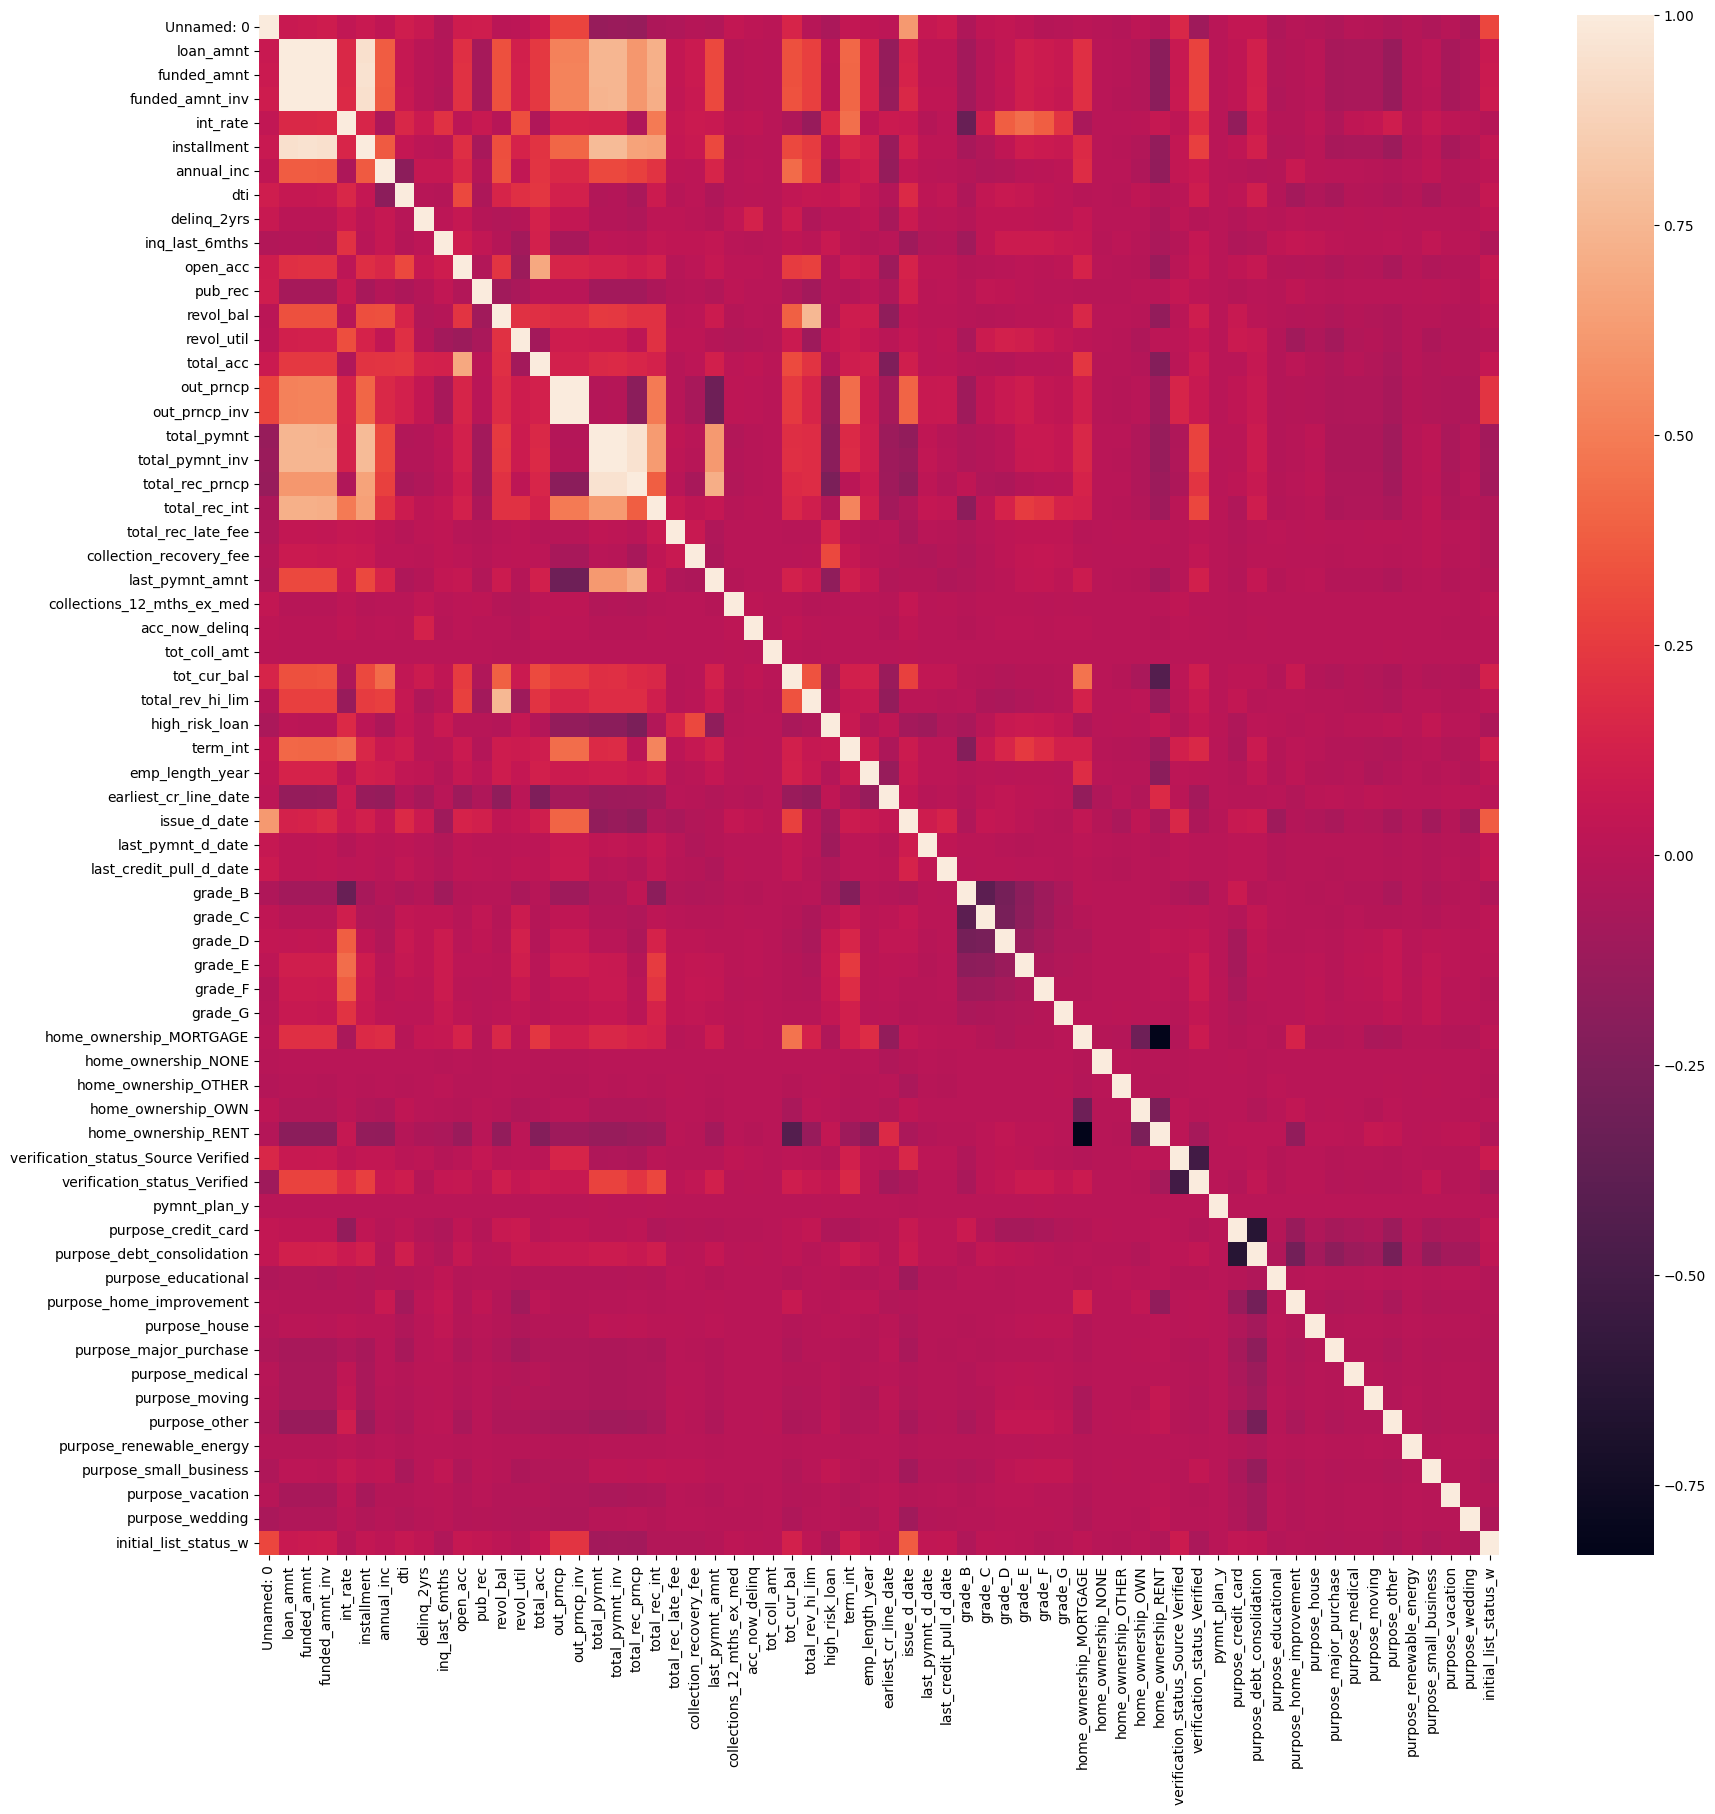

In [837]:
# heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr())

In [838]:
# drop highly correlated data
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.45)]

print(to_drop_hicorr)

data.drop(to_drop_hicorr, axis=1, inplace=True)

['funded_amnt', 'funded_amnt_inv', 'installment', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'total_rev_hi_lim', 'term_int', 'issue_d_date', 'home_ownership_MORTGAGE', 'home_ownership_RENT', 'verification_status_Verified', 'purpose_debt_consolidation']


In [839]:
'''
Standardization
'''

'\nStandardization\n'

In [840]:
'''
Modeling
'''

'\nModeling\n'

In [841]:
data.shape

(466285, 46)

<Axes: xlabel='high_risk_loan', ylabel='count'>

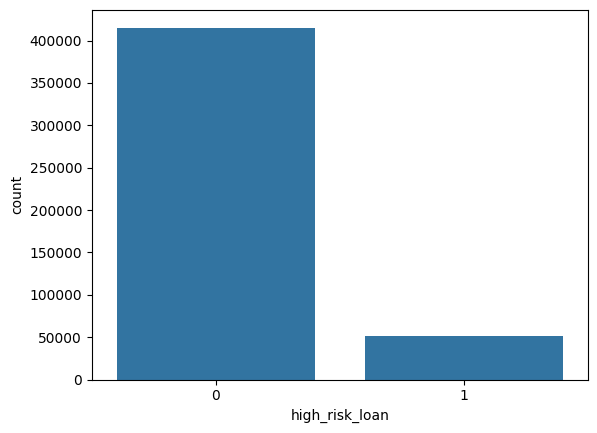

In [842]:
# high_risk_loan
sns.countplot(x= 'high_risk_loan', data=data)

In [843]:
data['earliest_cr_line_date'] = pd.to_numeric(data['earliest_cr_line_date'])
data['last_pymnt_d_date'] = pd.to_numeric(data['last_pymnt_d_date'])
data['last_credit_pull_d_date'] = pd.to_numeric(data['last_credit_pull_d_date'])

In [844]:
from sklearn.model_selection import train_test_split

X = data.drop('high_risk_loan', axis=1)
y = data['high_risk_loan']

# oversample data
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(sampling_strategy='not majority')
# X_resample, y_resample = ros.fit_resample(X, y)

# undersample data
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='not minority')
X_resample, y_resample = rus.fit_resample(X, y)

train_X, test_X, train_y, test_y = train_test_split(X_resample, y_resample, test_size=0.3, random_state=0)


In [845]:
# test best model setting
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score
# results = {}

# def score_model(X, y, n_estimators, max_depth):
#     model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42,)
#     scores = cross_val_score(model, X, y, cv=3, scoring='accuracy',)
#     print(f'n_estimators={n_estimators}, max_depth={max_depth}, accuracy={scores.mean()}')
#     return scores.mean()

# for i in range(1, 6):
#     for j in range(1, 4):
#         model_score = score_model(X_resample, y_resample, i*100, j)
#         results[f'{i*100}_{j}'] = model_score

# plt.figure(figsize=(25,10))
# plt.plot(list(results.keys()), list(results.values()))
# plt.title('Accuracy Score by n_estimators and max_depth')
# plt.xlabel('n_estimators_max_depth')
# plt.ylabel('Accuracy Score')

In [846]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
randomForest.fit(train_X, train_y)
randomForest.score(test_X, test_y)

0.8192668650469246

Score: 0.8192668650469246
Accuracy score (train): 0.8192668650469246
Accuracy score (test): 0.8192668650469246
              precision    recall  f1-score   support

           0       0.81      0.83      0.82     15181
           1       0.83      0.81      0.82     15400

    accuracy                           0.82     30581
   macro avg       0.82      0.82      0.82     30581
weighted avg       0.82      0.82      0.82     30581

Percentage of good loan predicted as bad loan: 16.698504709834662%
Percentage of bad loan predicted as good loan: 19.428571428571427%
Total percentage of wrong prediction: 18.073313495307545%
Root Mean Square Error: 0.4251271985571794


[]

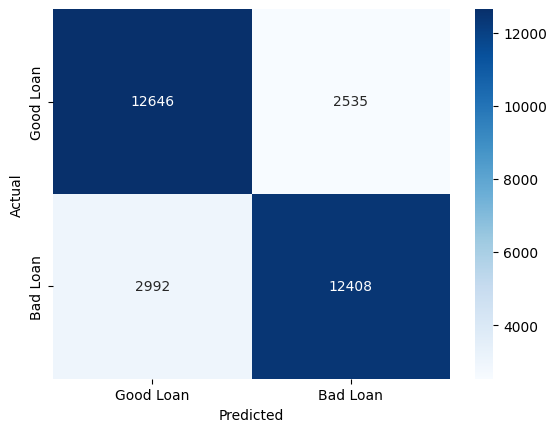

In [847]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

rf_predictions = randomForest.predict(test_X)

cm = confusion_matrix(test_y, rf_predictions)

print(f"Score: {randomForest.score(test_X, test_y)}")

print(f'Accuracy score (train): {accuracy_score(test_y, rf_predictions)}')
print(f'Accuracy score (test): {accuracy_score(test_y, rf_predictions)}')

print(classification_report(test_y, rf_predictions))

# percentage of good loan predicted as bad loan
print(f'Percentage of good loan predicted as bad loan: {cm[0][1]/(cm[0][0] + cm[0][1]) * 100}%')

# percentage of bad loan predicted as good loan
print(f'Percentage of bad loan predicted as good loan: {cm[1][0]/(cm[1][0] + cm[1][1]) * 100}%')

# total percentage of wrong prediction
print(f'Total percentage of wrong prediction: {(cm[0][1] + cm[1][0])/(cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]) * 100}%')

# root mean square error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, rf_predictions))
print(f'Root Mean Square Error: {rmse}')

# confusion metrix visualization
disp = sns.heatmap(
    cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Good Loan', 'Bad Loan'], yticklabels=['Good Loan', 'Bad Loan', ]
    )
plt.xlabel('Predicted')
plt.ylabel('Actual')
disp.plot()


In [848]:
data.head()

,Unnamed: 0,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_rec_late_fee,collection_recovery_fee,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,high_risk_loan,emp_length_year,earliest_cr_line_date,last_pymnt_d_date,last_credit_pull_d_date,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,verification_status_Source Verified,pymnt_plan_y,purpose_credit_card,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w
0,0,5000,10.65,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,0.00,0.00,0.0,0.0,0.0,0.0,0,10.0,473385600000000000,1420070400000000000,1451606400000000000,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,2500,15.27,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,0.00,1.11,0.0,0.0,0.0,0.0,1,0.0,922924800000000000,1364774400000000000,1377993600000000000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2400,15.96,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,0.00,0.00,0.0,0.0,0.0,0.0,0,10.0,1004572800000000000,1401580800000000000,1451606400000000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,10000,13.49,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,16.97,0.00,0.0,0.0,0.0,0.0,0,10.0,823132800000000000,1420070400000000000,1420070400000000000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,4,3000,12.69,80000.0,17.94,0.0,0.0,15.0,0.0,27783,53.9,0.00,0.00,0.0,0.0,0.0,0.0,0,1.0,820454400000000000,1451606400000000000,1451606400000000000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [849]:
# feature importance
importance = randomForest.feature_importances_
imp_names = train_X.columns.values

imp_df = pd.DataFrame({'feature': imp_names, 'importance': importance})
imp_df = imp_df.sort_values('importance', ascending=False)
print(imp_df)


                                feature    importance
12              collection_recovery_fee  3.400592e-01
19                    last_pymnt_d_date  3.088851e-01
2                              int_rate  1.029070e-01
20              last_credit_pull_d_date  8.796167e-02
11                   total_rec_late_fee  4.864370e-02
0                            Unnamed: 0  2.955248e-02
24                              grade_E  1.564346e-02
16                          tot_cur_bal  1.394989e-02
25                              grade_F  1.095858e-02
3                            annual_inc  9.336996e-03
23                              grade_D  8.734594e-03
21                              grade_B  6.676259e-03
4                                   dti  3.854262e-03
10                           revol_util  3.718060e-03
44                initial_list_status_w  2.358765e-03
6                        inq_last_6mths  1.390473e-03
41               purpose_small_business  1.348628e-03
32                  purpose_